# De statistieken in het WK voetbal notebook

In [17]:
# Alle benodigde imports en datasets
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
wk2018 = pd.read_csv('FIFA 2018 Statistics.csv')
wk2022 = pd.read_csv('Fifa_world_cup_matches.csv')
wk_df = pd.read_csv('wk_merged_datasets.csv')

In [8]:
# kolom met overtredingen van 2018
fouls_2018 = wk_df['Fouls Committed']
# kolommen met de overtredingen van 2022
fouls_2022 = wk_df['fouls against team1'] + wk_df['fouls against team2']

# Gegevens voor de boxplot
data = [go.Box(y = fouls_2018, name = 'WK 2018', marker_color = 'green'),
        go.Box(y = fouls_2022, name = 'WK 2022', marker_color = 'blue')]

# Opmaak
layout = go.Layout(
    title = 'Figuur 1: Overtredingen per jaar in cijfers',
    xaxis = dict(title = 'Jaar'),
    yaxis = dict(title = 'Aantal overtredingen'),
    showlegend = True)

# Boxplot maken
fig = go.Figure(data = data, layout = layout)

# Grafiek weergeven
fig.show()

De boxplot in figuur 1 geeft de statistieken wat betreft het aantal overtredingen per WK weer. De rest van de caption komt als die af is, want deze is nog niet helemaal goed (door de dubbele rijen van het 2018 databestand)!
- Is het aantal overtredingen meer/gelijk/minder?

In [9]:
# Alle gele kaarten
yellow_cards_2022 = wk_df['yellow cards team1'].sum() + wk_df['yellow cards team2'].sum()
yellow_cards_2018 = wk_df['Yellow Card'].sum()

# Alle rode kaarten
red_cards_2022 = wk_df['red cards team1'].sum() + wk_df['red cards team2'].sum()
red_cards_2018 = wk_df['Red'].sum() + wk_df['Yellow & Red'].sum()

# Lijsten met verschillende gegevens
# geel = #FFD700
# rood = #FF0000
years = ['2018', '2022']
yellow_cards = [yellow_cards_2018, yellow_cards_2022]
red_cards = [red_cards_2018, red_cards_2022]
colors = ['#FFD700', '#FF0000', '#FFD700', '#FF0000']  # Geel en rood

# Punten voor gele kaarten in 2018
trace_yellow_2018 = go.Scatter(
    x = [years[0]],
    y = [yellow_cards[0]],
    mode = 'markers',
    name = 'Gele kaarten 2018',
    marker = dict(color = colors[0], size = 8))

# Punten voor rode kaarten in 2018
trace_red_2018 = go.Scatter(
    x = [years[0]],
    y = [red_cards[0]],
    mode = 'markers',
    name = 'Rode kaarten 2018',
    marker = dict(color = colors[1], size = 8))

# Punten voor gele kaarten in 2022
trace_yellow_2022 = go.Scatter(
    x = [years[1]],
    y = [yellow_cards[1]],
    mode = 'markers',
    name = 'Gele kaarten 2022',
    marker = dict(color = colors[2], size = 8))

# Punten voor rode kaarten in 2022
trace_red_2022 = go.Scatter(
    x = [years[1]],
    y = [red_cards[1]],
    mode = 'markers',
    name = 'Rode kaarten 2022',
    marker = dict(color = colors[3], size = 8))

# Gegevens samenvoegen in een lijst
data = [trace_yellow_2018, trace_red_2018, trace_yellow_2022, trace_red_2022]

# Grafische opmaak
layout = go.Layout(
    title = 'Figuur 2: Aantal gele en rode kaarten per jaar',
    xaxis = dict(title = 'Jaar', type = 'category', showgrid = True),
    yaxis = dict(title = 'Aantal kaarten', showgrid = True),
    showlegend = True)

# plot maken
fig = go.Figure(data = data, layout = layout)
fig.show()

Figuur 2 geeft een figuur met vier punten, elke punt representeerd een kleur kaart per jaar. Als je met de muis over de punten gaat, geeft de plot een jaartal gevolgd door het aantal rode/gele kaarten. Figuur 2 laat zien dat er zowel in het WK van 2018 als in het WK van 2022 vier rode kaarten zijn gegeven. Daarnaast zijn er in het WK van 2022 iets meer gele kaarten (226) dan in het WK van 2018 (217).

In [10]:
selected_columns2022 = wk_df.loc[:, ['fouls against team1', 'fouls against team2', 'category']]

# Verwijder NaN-waarden in de 'category'-kolom
selected_columns2022 = selected_columns2022.dropna(subset=['category'])

# Data voor groepsfase en knock-outfase
groepsfase = selected_columns2022[selected_columns2022['category'].str.contains('Group')]
knockoutfase = selected_columns2022[~selected_columns2022['category'].str.contains('Group')]

# Totaal aantal overtredingen per fase
groepsfase_overtredingen = groepsfase['fouls against team1'] + groepsfase['fouls against team2']
knockoutfase_overtredingen = knockoutfase['fouls against team1'] + knockoutfase['fouls against team2']

# Staafdiagram
fig = go.Figure()
fig.add_trace(go.Bar(x = groepsfase['category'], y = groepsfase_overtredingen, name = 'Groepsfase'))
fig.add_trace(go.Bar(x = knockoutfase['category'], y = knockoutfase_overtredingen, name = 'Knock-outfase'))

fig.update_layout(title = 'Figuur 3: Aantal overtredingen per groepsfase en ronde (2022)',
                  xaxis_title = 'Fase',
                  yaxis_title = 'Aantal overtredingen')

fig.show()

Figuur 3 laat goed zien hoeveel overtredingen er per groep en ronde zijn gemaakt in het WK van 2022. Je kan met de cursor over de staven om het aantal overtredingen per wedstrijd te krijgen. Elke staaf is opgedeeld in een aantal vlakken, deze vlakken representeren een wedstrijd (elke staaf in de groepsfase heeft zes vlakken, die staan voor zes wedstrijden). 

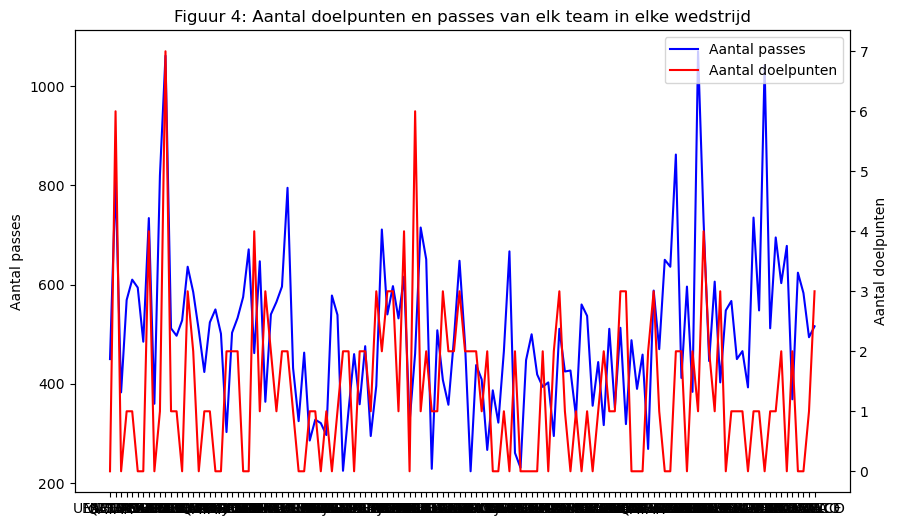

In [13]:
data = wk_df
# Select the first 64 team names and pass counts from team1 and passes team1 columns
team1_names = data['team1'].tolist()[:64]
team1_passes = data['passes team1'].tolist()[:64]

# Select the first 64 team names and pass counts from team2 and passes team2 columns
team2_names = data['team2'].tolist()[:64]
team2_passes = data['passes team2'].tolist()[:64]

# Select the first 64 goals conceded by team2 for team1 names
team1_goals_conceded = data['conceded team2'].tolist()[:64]

# Select the first 64 goals conceded by team1 for team2 names
team2_goals_conceded = data['conceded team1'].tolist()[:64]

# Combine the team names and pass counts from both teams
all_team_names = team1_names + team2_names
all_passes = team1_passes + team2_passes

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot the passes on the first y-axis
ax1.plot(all_passes, color='blue', label='Aantal passes')
ax1.set_ylabel('Aantal passes')

# tegengoals combineren
all_goals_conceded = team1_goals_conceded + team2_goals_conceded

# goals plotten
ax2.plot(all_goals_conceded, color='red', label='Aantal doelpunten')
ax2.set_ylabel('Aantal doelpunten')

# leganda's combineren
lines, labels = ax1.get_legend_handles_labels()
ax2_lines, ax2_labels = ax2.get_legend_handles_labels()
lines += ax2_lines
labels += ax2_labels
plt.legend(lines, labels)

plt.xticks(range(len(all_team_names)), all_team_names, rotation=45)

# titel
plt.title('Figuur 4: Aantal doelpunten en passes van elk team in elke wedstrijd')

# plot maken
plt.show()

Pearsons’ R voor de twee variabelen: passes en goals = 0.1312782432752839. Dit laat zien dat er een hele zwakke relatie is tussen beide variabelen, wat een logisch resultaat is. Veel passes hoeven namelijk zeker niet te leiden tot veel goals. Een team kan namelijk ook rondspelen, zonder resultaat te boeken. Dit leidt tot vele goede passes, maar tot weinig doelpunten. Dit blijkt ook uit de grafiek, omdat er eigenlijk niet echt een relatie aan te tonen is. Dit geldt op dit moment alleen voor het WK 2022, omdat dit nog bekeken moet worden voor het WK 2018. Dit zal later geanalyseerd worden, zodat beide vergeleken kunnen worden.


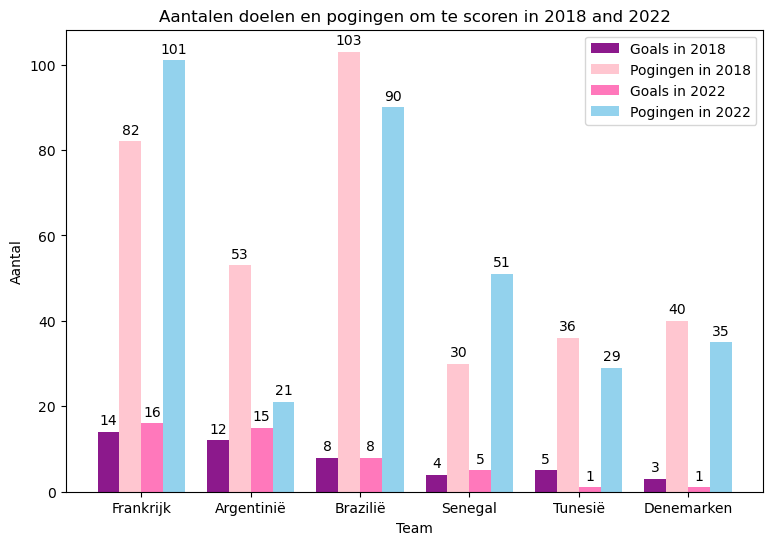

In [19]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
teams = ['Frankrijk', 'Argentinië', 'Brazilië', 'Senegal', 'Tunesië', 'Denemarken']

goals_2018 = [14, 12, 8, 4, 5, 3]

goals_2022 = [16, 15, 8, 5, 1, 1]

pogingen_2018 = [82, 53, 103, 30, 36, 40]

pogingen_2022 = [101, 21, 90, 51, 29, 35]

fig, ax = plt.subplots(figsize=(9, 6))

bar_width = 0.2

opacity = 0.9

index = np.arange(len(teams))

goals2018 = plt.bar(index,goals_2018,bar_width,alpha=opacity,color='purple',label='Goals in 2018')

autolabel(goals2018)

pogingen2018 = plt.bar(index + bar_width,pogingen_2018, bar_width,alpha=opacity,color='pink', label='Pogingen in 2018')

autolabel(pogingen2018)

goals2022 = plt.bar(index + 2 * bar_width,goals_2022, bar_width,alpha=opacity,color='#FF69B4',label='Goals in 2022')

autolabel(goals2022)

pogingen2022 = plt.bar(index + 3 * bar_width, pogingen_2022, bar_width,alpha=opacity,color='#87CEEB',label='Pogingen in 2022')

autolabel(pogingen2022)

# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')

plt.xlabel('Team')

plt.ylabel('Aantal')

plt.title('Figuur 5: Aantal goals en pogingen om te scoren in 2018 and 2022')

plt.xticks(index + 1.5 * bar_width, teams)

plt.legend()

plt.show()
